# Importing Libraries

In [45]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers, utils

import matplotlib.pyplot as plt


Data was scrapped using scrapping tool

# READING THE DATA 

In [46]:
matches=pd.read_csv('./data/PSL_2016-2020.csv')
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 15 columns):
Team_1              127 non-null object
Team_2              127 non-null object
Team1_Code          127 non-null object
Team2_Code          127 non-null object
Season              127 non-null int64
venue               127 non-null object
id                  127 non-null int64
Win_By_Wkts         127 non-null int64
Win_By_Runs         127 non-null int64
toss_winner         127 non-null object
toss_winner_code    127 non-null object
toss_decision       127 non-null object
result              127 non-null object
winner              127 non-null object
winner_code         127 non-null object
dtypes: int64(4), object(11)
memory usage: 15.0+ KB


#### NO NULL VALUES FOUND

# DATA

In [47]:
matches.head()

,Team_1,Team_2,Team1_Code,Team2_Code,Season,venue,id,Win_By_Wkts,Win_By_Runs,toss_winner,toss_winner_code,toss_decision,result,winner,winner_code
0,ISLAMABAD UNITED,QUETTA GLADIATORS,IU,QG,2016,Dubai,1,8,0,QUETTA GLADIATORS,QG,field,normal,QUETTA GLADIATORS,QG
1,KARACHI KINGS,LAHORE QALANDARS,KK,LQ,2016,Dubai,2,7,0,KARACHI KINGS,KK,field,normal,KARACHI KINGS,KK
2,PESHAWAR ZALMI,ISLAMBAD UNITED,PZ,IU,2016,Dubai,3,0,24,PESHAWAR ZALMI,PZ,bat,normal,PESHAWAR ZALMI,PZ
3,QUETTA GLADIATORS,KARACHI KINGS,QG,KK,2016,Dubai,4,8,0,QUETTA GLADIATORS,QG,field,normal,QUETTA GLADIATORS,QG
4,LAHORE QALANDARS,PESHAWAR ZALMI,LQ,PZ,2016,Dubai,5,9,0,PESHAWAR ZALMI,PZ,field,normal,PESHAWAR ZALMI,PZ


In [48]:
matches.tail()

,Team_1,Team_2,Team1_Code,Team2_Code,Season,venue,id,Win_By_Wkts,Win_By_Runs,toss_winner,toss_winner_code,toss_decision,result,winner,winner_code
122,LAHORE QALANDARS,ISLAMABAD UNITED,LQ,IU,2020,karachi,122,1,0,ISLAMABAD UNITED,IU,field,normal,ISLAMABAD UNITED,IU
123,MULTAN SULTANS,PESHAWAR ZALMI,MS,PZ,2020,karachi,123,6,0,MULTAN SULTANS,MS,field,normal,MULTAN SULTANS,MS
124,ISLAMABAD UNITED,QUETTA GLADIATORS,IU,QG,2020,karachi,124,5,0,QUETTA GLADIATORS,QG,field,normal,QUETTA GLADIATORS,QG
125,MULTAN SULTANS,KARACHI KINGS,MS,KK,2020,karachi,125,0,52,KARACHI KINGS,KK,field,normal,MULTAN SULTANS,MS
126,ISLAMABAD UNITED,QUETTA GLADIATORS,IU,QG,2020,karachi,124,5,0,QUETTA GLADIATORS,QG,field,normal,QUETTA GLADIATORS,QG


In [49]:
encode = {'Team1_Code': {'KK':1,'LQ':2,'MS':3,'IU':4,'PZ':5 ,'QG':6},
          'Team2_Code': {'KK':1,'LQ':2,'MS':3,'IU':4,'PZ':5 ,'QG':6},
          'toss_winner_code': {'KK':1,'LQ':2,'MS':3,'IU':4,'PZ':5 ,'QG':6},
          'winner_code': {'KK':1,'LQ':2,'MS':3,'IU':4,'PZ':5 ,'QG':6,'MT':7,'MA':8},
         'toss_decision': {'field':1,'bat':2}}
matches.replace(encode,inplace=True)
matches.head()

,Team_1,Team_2,Team1_Code,Team2_Code,Season,venue,id,Win_By_Wkts,Win_By_Runs,toss_winner,toss_winner_code,toss_decision,result,winner,winner_code
0,ISLAMABAD UNITED,QUETTA GLADIATORS,4,6,2016,Dubai,1,8,0,QUETTA GLADIATORS,6,1,normal,QUETTA GLADIATORS,6
1,KARACHI KINGS,LAHORE QALANDARS,1,2,2016,Dubai,2,7,0,KARACHI KINGS,1,1,normal,KARACHI KINGS,1
2,PESHAWAR ZALMI,ISLAMBAD UNITED,5,4,2016,Dubai,3,0,24,PESHAWAR ZALMI,5,2,normal,PESHAWAR ZALMI,5
3,QUETTA GLADIATORS,KARACHI KINGS,6,1,2016,Dubai,4,8,0,QUETTA GLADIATORS,6,1,normal,QUETTA GLADIATORS,6
4,LAHORE QALANDARS,PESHAWAR ZALMI,2,5,2016,Dubai,5,9,0,PESHAWAR ZALMI,5,1,normal,PESHAWAR ZALMI,5


In [50]:
matches.describe()

,Team1_Code,Team2_Code,Season,id,Win_By_Wkts,Win_By_Runs,toss_winner_code,toss_decision,winner_code
count,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000
mean,3.543307,3.755906,2017.874016,63.685039,4.212598,8.259843,3.826772,1.149606,4.141732
std,1.641505,1.888632,1.247169,36.415525,5.207793,16.851929,1.869108,0.358098,1.798255
min,1.000000,1.000000,2016.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2017.000000,32.500000,0.000000,0.000000,2.000000,1.000000,3.000000
50%,4.000000,4.000000,2018.000000,64.000000,5.000000,0.000000,4.000000,1.000000,4.000000
75%,5.000000,5.500000,2019.000000,94.500000,7.000000,5.500000,5.000000,1.000000,6.000000
max,6.000000,6.000000,2020.000000,125.000000,50.000000,67.000000,6.000000,2.000000,8.000000


#### For Finding The Team code the key or value

In [51]:
dicVal = encode['winner_code']
print(dicVal['QG']) #key value
print(list(dicVal.keys())[list(dicVal.values()).index(6)]) #find key by value search 

6
QG


In [52]:
df = pd.DataFrame(matches)
df.describe()

,Team1_Code,Team2_Code,Season,id,Win_By_Wkts,Win_By_Runs,toss_winner_code,toss_decision,winner_code
count,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000
mean,3.543307,3.755906,2017.874016,63.685039,4.212598,8.259843,3.826772,1.149606,4.141732
std,1.641505,1.888632,1.247169,36.415525,5.207793,16.851929,1.869108,0.358098,1.798255
min,1.000000,1.000000,2016.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2017.000000,32.500000,0.000000,0.000000,2.000000,1.000000,3.000000
50%,4.000000,4.000000,2018.000000,64.000000,5.000000,0.000000,4.000000,1.000000,4.000000
75%,5.000000,5.500000,2019.000000,94.500000,7.000000,5.500000,5.000000,1.000000,6.000000
max,6.000000,6.000000,2020.000000,125.000000,50.000000,67.000000,6.000000,2.000000,8.000000


# Saving Total Winnig by each team in DataFrame

In [53]:
wins = df["winner_code"]
tot_wins = dict(wins.value_counts())
tot_wins

{6: 30, 5: 28, 4: 27, 1: 18, 3: 10, 2: 10, 8: 2, 7: 2}

In [54]:
df

,Team_1,Team_2,Team1_Code,Team2_Code,Season,venue,id,Win_By_Wkts,Win_By_Runs,toss_winner,toss_winner_code,toss_decision,result,winner,winner_code
0,ISLAMABAD UNITED,QUETTA GLADIATORS,4,6,2016,Dubai,1,8,0,QUETTA GLADIATORS,6,1,normal,QUETTA GLADIATORS,6
1,KARACHI KINGS,LAHORE QALANDARS,1,2,2016,Dubai,2,7,0,KARACHI KINGS,1,1,normal,KARACHI KINGS,1
2,PESHAWAR ZALMI,ISLAMBAD UNITED,5,4,2016,Dubai,3,0,24,PESHAWAR ZALMI,5,2,normal,PESHAWAR ZALMI,5
3,QUETTA GLADIATORS,KARACHI KINGS,6,1,2016,Dubai,4,8,0,QUETTA GLADIATORS,6,1,normal,QUETTA GLADIATORS,6
4,LAHORE QALANDARS,PESHAWAR ZALMI,2,5,2016,Dubai,5,9,0,PESHAWAR ZALMI,5,1,normal,PESHAWAR ZALMI,5
5,ISLAMABAD UNITED,KARACHI KINGS,4,1,2016,Dubai,6,0,2,KARACHI KINGS,1,1,normal,ISLAMABAD UNITED,4
6,QUETTA GLADIATORS,PESHAWAR ZALMI,6,5,2016,Dubai,7,3,0,QUETTA GLADIATORS,6,1,normal,QUETTA GLADIATORS,6
7,LAHORE QALANDARS,QUETTA GLADIATORS,2,6,2016,Dubai,8,0,63,QUETTA GLADIATORS,6,1,normal,LAHORE QALANDARS,2
8,ISLAMABAD UNITED,LAHORE QALANDARS,4,2,2016,Dubai,9,8,0,ISLAMABAD UNITED,4,1,normal,ISLAMABAD UNITED,4
9,KARACHI KINGS,PESHAWAR ZALMI,1,5,2016,Dubai,10,0,3,PESHAWAR ZALMI,5,2,normal,PESHAWAR ZALMI,5


In [55]:
df['team1_total_wins'] = df['Team1_Code'].map(tot_wins)
df['team2_total_wins'] = df['Team2_Code'].map(tot_wins)
df

,Team_1,Team_2,Team1_Code,Team2_Code,Season,venue,id,Win_By_Wkts,Win_By_Runs,toss_winner,toss_winner_code,toss_decision,result,winner,winner_code,team1_total_wins,team2_total_wins
0,ISLAMABAD UNITED,QUETTA GLADIATORS,4,6,2016,Dubai,1,8,0,QUETTA GLADIATORS,6,1,normal,QUETTA GLADIATORS,6,27,30
1,KARACHI KINGS,LAHORE QALANDARS,1,2,2016,Dubai,2,7,0,KARACHI KINGS,1,1,normal,KARACHI KINGS,1,18,10
2,PESHAWAR ZALMI,ISLAMBAD UNITED,5,4,2016,Dubai,3,0,24,PESHAWAR ZALMI,5,2,normal,PESHAWAR ZALMI,5,28,27
3,QUETTA GLADIATORS,KARACHI KINGS,6,1,2016,Dubai,4,8,0,QUETTA GLADIATORS,6,1,normal,QUETTA GLADIATORS,6,30,18
4,LAHORE QALANDARS,PESHAWAR ZALMI,2,5,2016,Dubai,5,9,0,PESHAWAR ZALMI,5,1,normal,PESHAWAR ZALMI,5,10,28
5,ISLAMABAD UNITED,KARACHI KINGS,4,1,2016,Dubai,6,0,2,KARACHI KINGS,1,1,normal,ISLAMABAD UNITED,4,27,18
6,QUETTA GLADIATORS,PESHAWAR ZALMI,6,5,2016,Dubai,7,3,0,QUETTA GLADIATORS,6,1,normal,QUETTA GLADIATORS,6,30,28
7,LAHORE QALANDARS,QUETTA GLADIATORS,2,6,2016,Dubai,8,0,63,QUETTA GLADIATORS,6,1,normal,LAHORE QALANDARS,2,10,30
8,ISLAMABAD UNITED,LAHORE QALANDARS,4,2,2016,Dubai,9,8,0,ISLAMABAD UNITED,4,1,normal,ISLAMABAD UNITED,4,27,10
9,KARACHI KINGS,PESHAWAR ZALMI,1,5,2016,Dubai,10,0,3,PESHAWAR ZALMI,5,2,normal,PESHAWAR ZALMI,5,18,28


# Setting The Input Parameters

In [56]:
matches = matches[['Team1_Code','Team2_Code','toss_winner_code','toss_decision','winner_code',"team1_total_wins","team2_total_wins"]]
matches.head()

,Team1_Code,Team2_Code,toss_winner_code,toss_decision,winner_code,team1_total_wins,team2_total_wins
0,4,6,6,1,6,27,30
1,1,2,1,1,1,18,10
2,5,4,5,2,5,28,27
3,6,1,6,1,6,30,18
4,2,5,5,1,5,10,28


# Finding out the Total Number of Wins by each Team

In [57]:
temp1=df['toss_winner_code'].value_counts(sort=True)
temp2=df['winner_code'].value_counts(sort=True)
#'No of toss winners by each team'
print('No of toss winners by each team')
for idx, val in temp1.iteritems():
   print('{} -> {}'.format(list(dicVal.keys())[list(dicVal.values()).index(idx)],val))
print('No of match winners by each team')
for idx, val in temp2.iteritems():
   print('{} -> {}'.format(list(dicVal.keys())[list(dicVal.values()).index(idx)],val))
print("Where MA : Match Abandoned\n      MT: Match Tied")

No of toss winners by each team
QG -> 31
PZ -> 28
KK -> 26
IU -> 20
LQ -> 12
MS -> 10
No of match winners by each team
QG -> 30
PZ -> 28
IU -> 27
KK -> 18
MS -> 10
LQ -> 10
MA -> 2
MT -> 2
Where MA : Match Abandoned
      MT: Match Tied


# HISTOGRAM OF TEAM WINS

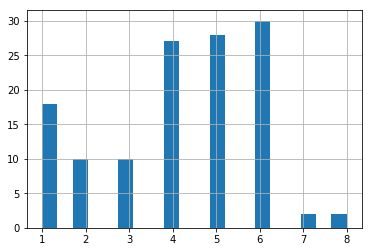

In [58]:
df['winner_code'].hist(bins=20)

#### Shows the Team labeled 6(i.e Quetta Gladiators) won most of the matches 

# Visualizing the toss wins and match wins

Text(0.5, 1.0, 'Match winners')

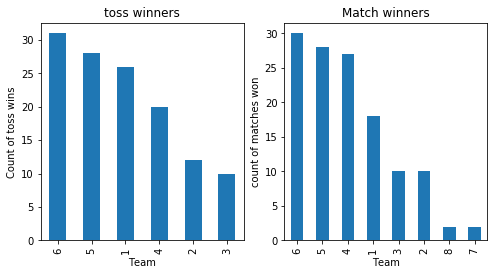

In [59]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Team')
ax1.set_ylabel('Count of toss wins')
ax1.set_title("toss winners")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Team')
ax2.set_ylabel('count of matches won')
ax2.set_title("Match winners")

##### Checking If there is any null value in our data

In [60]:
 df.apply(lambda x: sum(x.isnull()),axis=0) 
    #find the null values in every column

Team_1              0
Team_2              0
Team1_Code          0
Team2_Code          0
Season              0
venue               0
id                  0
Win_By_Wkts         0
Win_By_Runs         0
toss_winner         0
toss_winner_code    0
toss_decision       0
result              0
winner              0
winner_code         0
team1_total_wins    0
team2_total_wins    0
dtype: int64

In [61]:
df.shape

(127, 17)

# Building A predictive Model

In [62]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
    model.fit(data[predictors],data[outcome])
    predictions = model.predict(data[predictors])
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print('Accuracy : %s' % '{0:.3%}'.format(accuracy))
    kf = KFold(n_splits=7,random_state=None)
    error = []
    for train, test in kf.split(data[predictors]):
        train_predictors = (data[predictors].iloc[train,:])
        train_target = data[outcome].iloc[train]
        model.fit(train_predictors, train_target)
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
    print('Cross-Validation Score : %s' % '{0:.3%}'.format(np.mean(error)))

    model.fit(data[predictors],data[outcome]) 

In [63]:
matches.head(2)

,Team1_Code,Team2_Code,toss_winner_code,toss_decision,winner_code,team1_total_wins,team2_total_wins
0,4,6,6,1,6,27,30
1,1,2,1,1,1,18,10


In [107]:
from sklearn.ensemble import RandomForestRegressor
outcome_var=['winner_code']
predictor_var = ['Team1_Code','Team2_Code','toss_winner_code','toss_decision','team1_total_wins','team2_total_wins']
model = LogisticRegression()
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 44.094%
Cross-Validation Score : 35.297%


C:\Users\Rafey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rafey\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Rafey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Rafey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rafey\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataCo

In [114]:
model = RandomForestClassifier(n_estimators=60)
outcome_var = ['winner_code']
predictor_var = ['Team1_Code','Team2_Code','toss_winner_code','toss_decision','team1_total_wins','team2_total_wins']
classification_model(model, df,predictor_var,outcome_var)

C:\Users\Rafey\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Rafey\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Accuracy : 79.528%


C:\Users\Rafey\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Rafey\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Rafey\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Rafey\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Rafey\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vec

Cross-Validation Score : 49.499%


C:\Users\Rafey\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [115]:
team1='IU'
team2='QG'
toss_winner='QG'
input=[dicVal[team1],dicVal[team2],dicVal[toss_winner],'2','27','30']
input

[4, 6, 6, '2', '27', '30']

In [116]:
temp1=df['toss_winner_code'].value_counts(sort=True)
temp2=df['winner_code'].value_counts(sort=True)
#'No of toss winners by each team'
print('No of toss winners by each team')
for idx, val in temp1.iteritems():
   print('{} -> {}'.format(list(dicVal.keys())[list(dicVal.values()).index(idx)],val))
print('No of match winners by each team')
for idx, val in temp2.iteritems():
   print('{} -> {}'.format(list(dicVal.keys())[list(dicVal.values()).index(idx)],val))
print("Where MA : Match Abandoned\n      MT: Match Tied")

No of toss winners by each team
QG -> 31
PZ -> 28
KK -> 26
IU -> 20
LQ -> 12
MS -> 10
No of match winners by each team
QG -> 30
PZ -> 28
IU -> 27
KK -> 18
MS -> 10
LQ -> 10
MA -> 2
MT -> 2
Where MA : Match Abandoned
      MT: Match Tied


field: 1 bat 2

# MAKING PREDICTIONS

In [117]:
team1='IU'
team2='QG'
toss_winner='QG'
input=[dicVal[team1],dicVal[team2],dicVal[toss_winner],'2','27','30']
input = np.array(input).reshape((1, -1))
output=model.predict(input)
winner = list(dicVal.keys())[list(dicVal.values()).index(output)] #find key by value search output
print(f"The Winner is {winner}")

The Winner is QG


In [119]:
team1='QG'
team2='PZ'
toss_winner='QG'
input=[dicVal[team1],dicVal[team2],dicVal[toss_winner],'1','30','28']

input = np.array(input).reshape((1, -1))
output=model.predict(input)
winner = list(dicVal.keys())[list(dicVal.values()).index(output)] #find key by value search output
print(f"The Winner is {winner}")

The Winner is PZ


In [120]:
team1='KK'
team2='LQ'
toss_winner='LQ'
input=[dicVal[team1],dicVal[team2],dicVal[toss_winner],'1','18','10']

input = np.array(input).reshape((1, -1))
output=model.predict(input)
winner = list(dicVal.keys())[list(dicVal.values()).index(output)] #find key by value search output
print(f"The Winner is {winner}")

The Winner is KK


In [121]:
team1='IU'
team2='KK'
toss_winner='KK'
input=[dicVal[team1],dicVal[team2],dicVal[toss_winner],'1','27','18']

input = np.array(input).reshape((1, -1))
output=model.predict(input)
winner = list(dicVal.keys())[list(dicVal.values()).index(output)] #find key by value search output
print(f"The Winner is {winner}")

The Winner is KK


#### Important features of model

In [70]:
imp_input = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print(imp_input)

toss_winner_code    0.268879
Team2_Code          0.183687
Team1_Code          0.178957
team2_total_wins    0.170186
team1_total_wins    0.129871
toss_decision       0.068420
dtype: float64
